In [2]:
using Catalyst, DifferentialEquations, Plots, Latexify

# SELF PROMOTER

In [3]:
kepler = @reaction_network begin
    δ, m --> ∅
    α0*O0, ∅ --> m
    α1*O1, ∅ --> m
    a, M + M --> D
    (Θ*a), D --> M + M
    K, O0 + D --> O1
    (β*K), O1 --> O0 + D
end a Θ K β δ α0  α1

Model ##ReactionSystem#257 with 7 equations
States (5):
  m(t)
  M(t)
  D(t)
  O0(t)
  O1(t)
Parameters (7):
  a
  Θ
  K
  β
  δ
  α0
⋮

In [4]:
δ = 1
Θ = 10000
β = 10
α1 = 1000
α0 = 50
K = 0.15

0.15

In [5]:
odesys = convert(ODESystem, kepler)

Model ##ReactionSystem#257 with 5 equations
States (5):
  m(t)
  M(t)
  D(t)
  O0(t)
  O1(t)
Parameters (7):
  a
  Θ
  K
  β
  δ
  α0
⋮

In [6]:
speciesmap(kepler)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 5 entries:
  m(t)  => 1
  O1(t) => 5
  M(t)  => 2
  D(t)  => 3
  O0(t) => 4

In [7]:
paramsmap(kepler)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 7 entries:
  α0 => 6
  K  => 3
  Θ  => 2
  δ  => 5
  α1 => 7
  a  => 1
  β  => 4

In [8]:
p = (0.05, 10000, 0.15, 10, 1, 50, 1000)

u₀ = [20.,0.,0.,1.,0.2]

tspan = (0., 10000.)

oprob = ODEProblem(kepler, u₀, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10000.0)
u0: 5-element Vector{Float64}:
 20.0
  0.0
  0.0
  1.0
  0.2

┌ Warning: Interrupted. Larger maxiters is needed.
└ @ SciMLBase C:\Users\Hp\.julia\packages\SciMLBase\h4Gxc\src\integrator_interface.jl:331


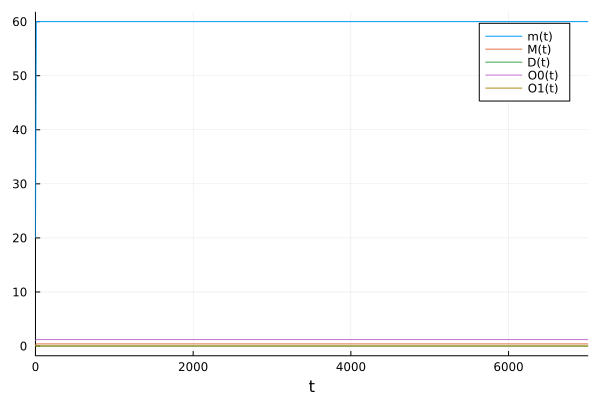

In [9]:
sol = solve(oprob, Tsit5(), saveat=10.)
plot(sol)

In [10]:
dprob = DiscreteProblem(kepler, u₀ , tspan , p)
jprob = JumpProblem(kepler, dprob, Direct(), save_positions = (false,false))

sol2 = solve(jprob , SSAStepper(), saveat=10.)
plot(sol2)

In [11]:
rn = @reaction_network begin
    ((b*a0+x^2)/(b+x^2)),∅ --> x
end a0 b x

Model ##ReactionSystem#262 with 1 equations
States (1):
  x(t)
Parameters (3):
  a0
  b
  x(t)

In [12]:
a0 = α0/α1

0.05

In [13]:
b = (Θ*β*δ^2)/(α1^2)

0.1

In [14]:
r = ((K*α1^2)/(Θ*δ^3))

15.0

In [15]:
speciesmap(rn)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 1 entry:
  x(t) => 1

In [16]:
paramsmap(rn)

Dict{SymbolicUtils.Symbolic{Real}, Int64} with 3 entries:
  a0   => 1
  b    => 2
  x(t) => 3

In [17]:
odefun = ODEFunction(convert(ODESystem,rn),jac=true)
F = (u,p) -> odefun(u,p,0)      
J = (u,p) -> odefun.jac(u,p,0)

#3 (generic function with 1 method)

In [18]:
p1 = (0.05, 0.1, 20. )

(0.05, 0.1, 20.0)

In [19]:
p_idx = 1            
p_span = (0.1,20.)   
plot_var_idx = 1 

1

In [20]:
using BifurcationKit, Plots, LinearAlgebra, Setfield

In [28]:
#p1 = (0.05, 0.1, 20. )

#u1 = [20.]

#tspan1 = (0., 10000.)

#oprob1 = ODEProblem(rn, u1, tspan1, p1)